In [1]:
import matplotlib.pyplot as plt
import numpy as np

#Revised Sellmeier formula; mat = [A,B,C,D,E,F]

def ref_index(mat,l): #wavelengths to be input in microns, not metres
    A = mat[0]; B = mat[1]; C = mat[2]; D = mat[3]; E = mat[4]; F = mat[5]
    u = A - B*(l)**2 + C/(l**2) + D/(l**4) - E/(l**6) + F/(l**8)
    return np.sqrt(u) 

#Defining the formula for extraordinary refractive index variation with angle

def N_inv(x,n_e,n_o): #formula for 1/n_e(\theta)
    return np.sqrt((((np.sin(x))**2)/(n_e)**2)+(((np.cos(x))**2)/(n_o)**2))

#Defining the formula for the normalized intensity I/Imax 

def I_norm(x,mat_0,mat_e,l): #arguments: angle (in degrees) & wavelength in microns
    n_o = ref_index(mat_0,l); n_e = ref_index(mat_e,2*l) #getting the ref. indices from the Sellmeier equations
    dk = ((2*np.pi)/l)*((2/(N_inv((x*(np.pi))/180,n_e,n_o)))-(n_o)) #defining the phase matching condition
    L = 1/(np.cos((x*(np.pi))/180)) #path length variation
    return ((np.sin((dk*L)/2))/((dk*L)/2))**2


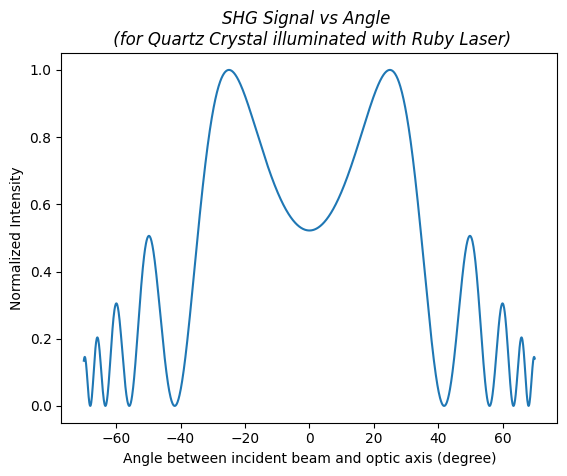

In [2]:
Q_od = [2.3573, -0.0117, 0.01054, 0.00013414, -4.4537e-07, 5.9236e-08]
Q_ed = [2.3849, -0.01259, 0.01079, 0.00016518, -1.9474e-06, 9.3648e-08]

#Wavelength of Ruby Laser is 694.3 nm

X = np.arange(-70,70,0.1)
Y = (I_norm(X,Q_od,Q_ed,0.6943))/(I_norm(25,Q_od,Q_ed,0.6943)) #Normalizing to 1

plt.plot(X,Y)
plt.xlabel("Angle between incident beam and optic axis (degree)")
plt.ylabel("Normalized Intensity")
plt.title("SHG Signal vs Angle \n (for Quartz Crystal illuminated with Ruby Laser)",fontstyle="italic")
plt.show()